In [1]:
import SAR
import arcplot as arc
import midi2nmat as m2n

# **Step 1: Import the midi file and convert it to a note matrix (nmat)**

**We do this with:**
```
path = "../Data/song.mid"
nmat = m2n.midi2nmat(path)
```

In [2]:
path = "../Data/Fugue-BWV-847.mid"
nmat = m2n.midi2nmat(path)

C:\Users\wsdul\Anaconda3\envs\DSci\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


#### **"nmat" is now a matrix containing the onset, duration, pitch, and voice channel of each note in the piece**

In [3]:
nmat

,Duration,Pitch,Ticks,Time,Type,Velocity,Voice
0,0.235417,79,NaN,8.5,NaN,64,0
1,0.235417,78,NaN,8.75,NaN,64,0
2,0.472917,79,NaN,9,NaN,64,0
3,0.472917,72,NaN,9.5,NaN,64,0
4,0.472917,75,NaN,10,NaN,64,0
5,0.235417,79,NaN,10.5,NaN,64,0
6,0.235417,78,NaN,10.75,NaN,64,0
7,0.472917,79,NaN,11,NaN,64,0
8,0.472917,81,NaN,11.5,NaN,64,0
9,0.472917,74,NaN,12,NaN,64,0


# Step 2: Find the patterns that we will plot

**We do this with:**
```
test = SAR.SAR_Contour(nmat)
```

In [4]:
test = SAR.SAR_Contour(nmat)

**"test" is now a dictionary containing a multitude of things, we are mainly interested in the "r" structure which is the final product of the search and rank algorithm after the redundant patterns have been removed**

In [5]:
test["r"]

,card,seg,segcount,segind,cov,invind,inds
0,6,"[2.0, 2.0, 2.0, 2.0, 1.0, 0.0]",15,"[39, 124, 285, 434, 501, 538, 546, 554, 562, 5...",90,[],"[39, 40, 41, 42, 43, 124, 125, 126, 127, 128, ..."
1,9,"[2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 4.0, 3.0, 2.0]",10,"[39, 124, 285, 434, 546, 562, 570, 663, 679, 695]",90,[],"[39, 40, 41, 42, 43, 44, 45, 46, 124, 125, 126..."
2,5,"[2.0, 2.0, 2.0, 1.0, 0.0]",17,"[40, 125, 216, 286, 435, 502, 539, 547, 555, 5...",85,[],"[40, 41, 42, 43, 125, 126, 127, 128, 216, 217,..."
3,6,"[2.0, 1.0, 0.0, 4.0, 3.0, 2.0]",13,"[42, 127, 280, 288, 437, 478, 533, 549, 565, 5...",78,[],"[42, 43, 44, 45, 46, 127, 128, 129, 130, 131, ..."
4,7,"[2.0, 2.0, 1.0, 0.0, 4.0, 3.0, 2.0]",11,"[41, 126, 287, 436, 477, 548, 564, 572, 665, 6...",77,[],"[41, 42, 43, 44, 45, 46, 126, 127, 128, 129, 1..."
5,9,"[1.0, 3.0, 1.0, 2.0, 4.0, 0.0, 2.0, 1.0, 2.0]",8,"[4, 75, 164, 247, 267, 385, 520, 729]",72,[],"[4, 5, 6, 7, 8, 9, 10, 11, 75, 76, 77, 78, 79,..."
6,9,"[0.0, 1.0, 3.0, 1.0, 2.0, 4.0, 0.0, 2.0, 1.0]",8,"[3, 74, 163, 246, 266, 384, 519, 728]",72,[],"[3, 4, 5, 6, 7, 8, 9, 10, 74, 75, 76, 77, 78, ..."
7,9,"[1.0, 2.0, 4.0, 0.0, 2.0, 1.0, 2.0, 4.0, 0.0]",8,"[6, 77, 166, 249, 269, 387, 522, 731]",72,[],"[6, 7, 8, 9, 10, 11, 12, 13, 77, 78, 79, 80, 8..."
8,9,"[3.0, 0.0, 1.0, 3.0, 1.0, 2.0, 4.0, 0.0, 2.0]",8,"[2, 73, 162, 245, 265, 383, 518, 727]",72,[],"[2, 3, 4, 5, 6, 7, 8, 9, 73, 74, 75, 76, 77, 7..."
9,5,"[1.0, 0.0, 4.0, 3.0, 2.0]",14,"[43, 128, 212, 281, 289, 438, 479, 534, 550, 5...",70,[],"[43, 44, 45, 46, 128, 129, 130, 131, 212, 213,..."


# Step 3: Plot the patterns

**We do this with:**
```
arc.plot(nmat, test["r"]["segind"].iloc[i], test["r"]["card"].iloc[i])
```

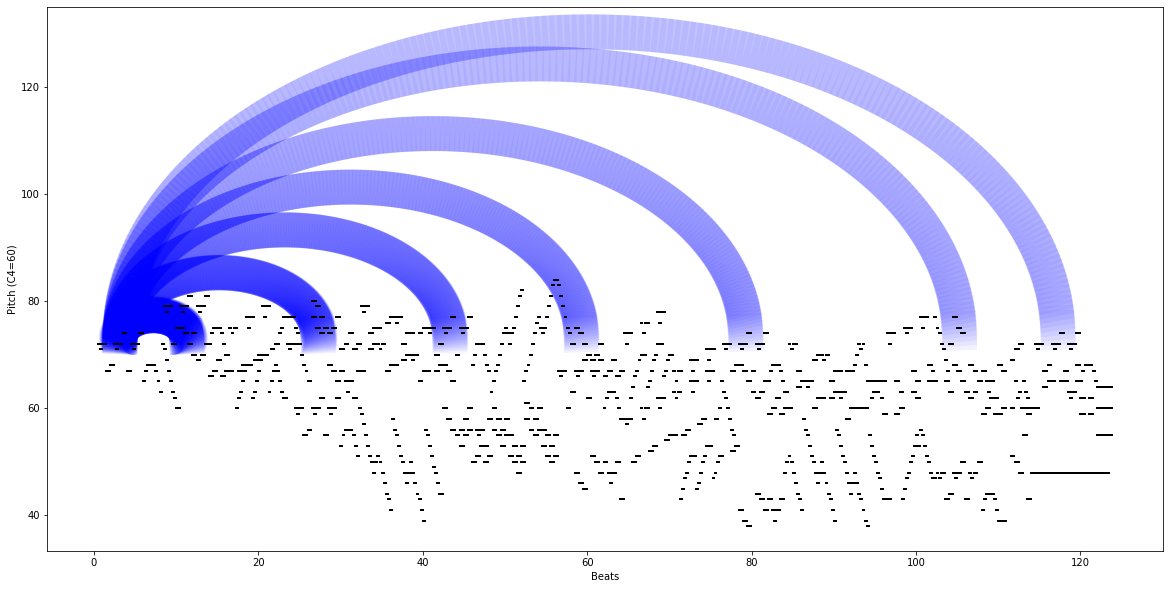

In [12]:
arc.plot(nmat, test["r"]["segind"].iloc[6], test["r"]["card"].iloc[6])

#### TODO:
1. Add ability to plot multiple patterns
2. Revert coloring to be picked from a color map

# BELOW IS THE CODE FOR EACH PIECE

### MIDI2NMAT
```python
import pandas as pd
import mido

def midi2nmat(path):
    """Returns a Note Matrix from a given MIDI files"""
    
    assert (type(path) is str), "Filepath must be a string: %r" % path
    mid = mido.MidiFile(path)
    tpb = mid.ticks_per_beat

    output=pd.DataFrame(columns=["Type", "Voice", "Pitch", "Velocity", "Ticks"])

    for track in mid.tracks:
        midiframe = pd.DataFrame(columns=["Type", "Voice", "Pitch", "Velocity", "Ticks"])
        for msg in track:
            if msg.type == "note_on":
                df = pd.DataFrame({"Type":msg.type, "Voice":msg.channel, "Pitch":msg.note, "Velocity":msg.velocity, "Ticks":msg.time},\
                              index=[0])
            else:
                df = pd.DataFrame({"Type":msg.type, "Ticks":msg.time},\
                              index=[0])
            midiframe = midiframe.append(df, ignore_index=True)
        

           
            
        midiframe["Time"] = pd.Series(midiframe["Ticks"].cumsum() / tpb, index=midiframe.index)

        note_on = midiframe.loc[(midiframe["Velocity"] != 0) & (midiframe["Type"] == "note_on")]
        note_off = midiframe.loc[(midiframe["Velocity"] == 0) & (midiframe["Type"] == "note_on")]
        newdex = range(0,len(note_off))

        

        note_off = note_off.reset_index(drop=True)
        note_on = note_on.reset_index(drop=True)


        note_on["Duration"] = pd.Series(note_off["Time"] - note_on["Time"], index = note_on.index)
        output=output.append(note_on[["Pitch", "Time", "Velocity", "Voice", "Duration"]])
        
    
    output.reset_index(drop=True, inplace=True)

    return output
    
```

### ARCPLOT
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

def plot(nmat,segind,segcard):
    """
    plot(nmat,segind,segcard)
    ######################################################
    
    Displays Arc Plot Diagram. This consists of a series of arcs overlayed on MIDI data presented horizontally.
    
    Parameters:
        nmat (pandas.df): A Note Matrix that contains pitch, timing, and velocity information for a series of notes.
        nmatRCE (pandas.df): A version of the Note Matrix which has each element reduced to a binary value.
        onsets (list): A list of values that describes when each note would begin in the piece.
        offsets (list): A list of values that describes when each note would end in the piece.
        segind (list): A list of lists of values that describe the occurences of each pattern found in the piece.
        segcard (list): A list that describes how many notes should be in each pattern.
    """
    
    onsets = nmat['Time']
#     offsets = onsets + nmat['Duration']
    pitch = nmat['Pitch']
    offsets = [sum(x) for x in zip(onsets, nmat['Duration'])]
    
    _midiplot(onsets,offsets,pitch)

    colornum=1
    #cmap1=jet(len(segcard))
    #cmap1 = plt.cm.get_cmap('jet')
    pitchmax=nmat['Pitch'].max()
    pitchmean=nmat['Pitch'].mean()
    pitchmean=(pitchmax+pitchmean)/2

    framelabels = ["Onset in Beats", "Durations in Beats", "Pitch (C4=60)"]
    rads = [1]
    # for i in range(0,len(segind)-1):
    #try:
    temp=onsets[segind]
    temp=temp.sort_values()
    #SortInd = temp.head() 
    SortInd=list(temp.index.values) 
    #r = r.sort_values(by=["cov"], ascending=False).reset_index(drop=True)
    ind=SortInd
    segind=ind
    #finally:
    #    pass
    #     try
    #         try
    #             simind=r(i).simind;
    #         catch
    #             simind=r(i).invind;
    #         end
    #     catch
    #         simind=[];
    #     end
    #       ind
    origxstart = onsets[segind[0]]
    card=segcard
    origxend=offsets[segind[0]+card-1]
    origwidth=origxend - origxstart
    origx=(origwidth) / 2 + origxstart
    linewidthstart= origwidth #need to normalize to pixel length
    origpitchmin=min(pitch[segind[0]:(segind[0] + card - 1)]) - 2
    colornoalpha=[colornum]
    colornum=colornum + 1
    
    for j in range(1,len(ind)):
        #noteInd = ind[j]
        #compxstart=nmat.iloc[noteInd,0]
        compxstart = onsets[ind[j]]
        #compxend=nmat.iloc[noteInd + (card - 1),0] + nmat.iloc[noteInd + (card - 1),1]
        compxend = offsets[ind[j]+card-1]
        compwidth=compxend - compxstart
        compx=(compwidth) / 2 + compxstart
        linewidthend= compwidth #need to normalize to pixel length
        comppitchmin=min(pitch[ind[j]:ind[j] + (card - 1)]) - 2
        rad=(compx - origx) / 2
        rads.append(rad)
        x=rad + origx
        nsegments=100
        linewidth=np.dot(card,3)
        
        if segcard:
            colornoalpha=[0,0,1]
            
        coloralpha=colornoalpha.append(0.5)
        _arc(x=x,y=pitchmean,r=rad,linewidthstart=linewidthstart,linewidthend=linewidthend)

def _arc(x,y,r,nsegments=100,coloralpha='r',linewidthstart=5,linewidthend=10):
    """
    _arc(x,y,r,nsegments=100,coloralpha='r',linewidthstart=5,linewidthend=10)
    #########################################################################
    
    Draws an arc from one point to another.
    
    Parameters:
        x (float): The time value the arc will start at.
        y (float): The pitch value the arc will start at.
        r (float): The radius of the arc.
        nsegments (int): The number of line segments that make up the arc.
        coloralpha (str): The color of the line segments.
        linewidthstart (int): the width of each line segment at the beginning.
        linewidthend (int): the width of each line segment at the end.
    """
    th=np.arange(0,np.pi,np.pi/200)
    xunit=r * np.cos(th) + x;
    yunit=r * np.sin(th) + y;
    linewidthincrement=(linewidthstart-linewidthend)/len(xunit);

    plt.figure(1)
    
    for i in range(2,len(th)):
        plt.plot([xunit[i-1],xunit[i]], [yunit[i-1],yunit[i]],'b',linewidth = 10*(linewidthend+i*linewidthincrement), zorder=0, alpha=0.05)
        
def _midiplot(onsets,offsets,pitch):
    plt.figure(figsize=(20,10))
    
    for i in range(0,len(onsets)):
        plt.plot([onsets[i],offsets[i]], [pitch[i],pitch[i]], 'k', lw=2, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()], zorder=5)
        
    plt.xlabel("Beats")
    plt.ylabel("Pitch (C4=60)")
```

### SEARCH AND RANK
```python
import pandas as pd
import numpy as np

def SAR_Contour(nmat, s_type=3, cmin=5, cmax=10, degrees=2):
    """Finds the unique patterns to be displayed and creates a structure to hold all the information needed to plot."""
    pitches=list(nmat['Pitch']) #Get the list of pitches for the piece
    contcom = _make_ContCM(pitches,degrees) #convert to continuous contour matrix
    CL = np.nansum(contcom, axis=0) #get the sums of the columns of the matrix
    
    if s_type > 1:
        durs=list(nmat['Time']) #extract beat onsets as a list
        durs=[x-y for x,y in zip(durs[1:len(durs)-1],durs[0:len(durs)-2])] #convert to interonset durations by subtracting adjacent onsets
        durs.append(nmat['Duration'].iloc[-1]) #add the duration of the last note back to list
        contcom=_make_ContCM(durs,degrees) #create continuous contour matrix
        DCL = np.nansum(contcom, axis=0) #get the sums of the columns of the matrix
        
    if s_type == 1:
        CL_list = [CL, CL]
    elif s_type == 2:
        CL_list = [DCL, DCL]
    elif s_type == 3:
        CL_list = [CL,DCL]
    
    p = _get_segments(cmin,cmax,pitches,CL_list) #makes a dataframe of all the important segments needed
    
    #initialize storage variables
#     allcov = []
    r = pd.DataFrame(columns=['card','seg','segcount','segind','cov','invind'])
    
    for i in range(0,len(p)):
        for j in range(0,len(p[i]["seg"])):
            r = r.append({"card":len(p[i]["seg"][j]),
                  "seg":p[i]["seg"][j],
                  "segcount":p[i]["segcount"][j],
                  "segind":p[i]["segind"][j],
                  "cov":p[i]["segcov"][j],
                  "invind":[]}, ignore_index=True)
#             allcov.append(p[i]["segcov"][j])

    r = r.sort_values(by=["cov"], ascending=False).reset_index(drop=True)

    s = []

    for i in range(0,len(r)):
        inds=[];
        for j in range(0,len(r["segind"].iloc[i])):
            a=r["segind"].iloc[i][j]
            b=r["segind"].iloc[i][j]+r["card"].iloc[i]-1
            temp=list(range(a,b))
            inds=inds+temp
        s.append(inds)
        
    r["inds"] = pd.Series(s, index=r.index) 
    
    for i in range(len(r)-1,1,-1):
        b=r["inds"].iloc[i]
        for j in range(0,i-1):
            a=r["inds"].iloc[j]
            if set(b).issubset(set(a)):
                r.drop(r.index[i], inplace=True)
                break
                
    r = r.sort_values(by=["cov"], ascending=False).reset_index(drop=True)
    
    return {"r":r, "p":p, "CL":CL_list, "nmat":nmat}

def _get_segments(cmin,cmax,pitches,CL_list):
    """returns a list containing the, at max, 5 unique pattern of notes that occur most frequently for every pattern length.
        i.e. the list looks like [(patterns of length 5), (patterns of length 6), (patterns of length 7), ...]"""
    p = []
    for n in range(cmin,cmax): #this should be a range of cardinalities to look over
        segments = [CL_list[0][i:i+n] for i in range(0, len(pitches)-n)] #get list of all possible segments of n cardinality
        segmentu = [list(x) for x in set(tuple(x) for x in segments)] #get the unique segments from the list

        segind = [[] for i in range(0,len(segmentu))] #get the index of these occurences of these segments, this also happens to be the index of the notes they start on
        for i in range(0,len(segmentu)):
            for j in range(0,len(segments)):
                if (segments[j] == segmentu[i]).all():
                    segind[i].append(j)

        if len(segments) == len(segmentu):
            break
        
        segmentucount = np.array([len(x) for x in segind]) #get a count of all the occurences for a given segment
#         segmentpitch = [pitches[ind[i][0]-2:ind[i][0]+n-1+2] for i in range(len(ind))] #get the pitches of the original occurence

        max_ind = np.argsort(segmentucount)[::-1][:5] #the indexes of the 5 most frequent segments so that the largest is in front
        max_segmentu = np.array(segmentu)[max_ind]
        max_segmentucount = segmentucount[max_ind]
#         max_segmentpitch = np.array(segmentpitch)[max_ind]
        max_segmentucov = [i*n for i in max_segmentucount]
        max_segind = np.array(segind)[max_ind]

        p.append({"segments":segments,
                  "seg":max_segmentu,
                  "segcount":max_segmentucount,
                  "segind":max_segind,
                  "segcov":max_segmentucov}) #storing the results in a data structure for later (will have index n-1)
    return p
    
def _make_ContCM(arr, deg1, deg2 = None):
    """
    Creates Continous Contour Matrix for searching
    Adapted for asynchrony
    """
    
    if deg2 is None:
        deg2 = deg1
    
    degrees = deg1 + deg2
    ContCM = np.zeros((degrees,len(arr))) #creates and initializes  contour matrix w/ zeroes
    ContCM.fill(np.nan)            #fills matrix with Null values
    for n in range(0,len(arr)):    
            for i in [1,2]:
                try:
                    if arr[n] > arr[n-i] and n-i >= 0 :
                        ContCM[deg1-i, n] = 1
                    elif n-i >= 0:
                        ContCM[deg1-i, n] = 0
                except:
                    continue

            for i in [1,2]:
                try:
                    if arr[n] > arr[n+i]:
                        ContCM[deg1+i-1, n] = 1
                    else:
                        ContCM[deg1+i-1, n] = 0
                except:
                    continue
    
    return ContCM
```